In [30]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from jax import random

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions.normal import Normal
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import os
import sys

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 
from flow import RealNVP

data = 'spiral'

Text(0.5, 1.0, 'RealNVP samples of Spiral data')

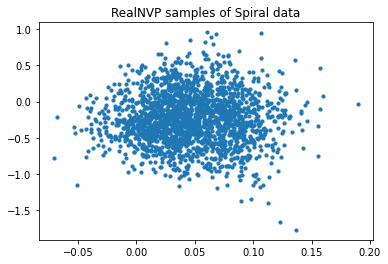

In [31]:
n_samples = 2000
noise_std = 0
epochs = 500
lr = 1e-3

result_dir = f'../models/{data}_samples_{n_samples}_epochs_{epochs}_lr_{lr:.0e}'
model = RealNVP(); model.load_state_dict(torch.load(result_dir + '/model'))

nsamples = 2000
z = torch.randn((nsamples,2),dtype=torch.float32)
with torch.no_grad():
    x = model.backward(z)
plt.scatter(x[:,0],x[:,1],s=10)
plt.title('RealNVP samples of Spiral data')